<a href="https://colab.research.google.com/github/narg1z/SQL/blob/main/Cyclistic%20research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

file = pd.ExcelFile('all trip data.xlsx')

df = pd.concat(
    [file.parse(sheet) for sheet in file.sheet_names],
    ignore_index=True
)

print("Размер таблицы:", df.shape)

Размер таблицы: (5552994, 13)


In [25]:
# Общая информация о таблице
df.info()

# Первые 5 строк
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552994 entries, 0 to 5552993
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 550.8+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7569BC890583FCD7,classic_bike,2025-01-21 17:23:54.538,2025-01-21 17:37:52.015,Wacker Dr & Washington St,KA1503000072,McClurg Ct & Ohio St,TA1306000029,41.883143,-87.637242,41.892592,-87.617289,member
1,013609308856B7FC,electric_bike,2025-01-11 15:44:06.795,2025-01-11 15:49:11.139,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Belmont Ave,TA1308000019,41.929147,-87.649153,41.939743,-87.658865,member
2,EACACD3CE0607C0D,classic_bike,2025-01-02 15:16:27.730,2025-01-02 15:28:03.230,Southport Ave & Waveland Ave,13235,Broadway & Cornelia Ave,13278,41.948226,-87.664071,41.945529,-87.646439,member
3,EAA2485BA64710D3,classic_bike,2025-01-23 08:49:05.814,2025-01-23 08:52:40.047,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member
4,7F8BE2471C7F746B,electric_bike,2025-01-16 08:38:32.338,2025-01-16 08:41:06.767,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member


In [26]:
df.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1184673
start_station_id,1184673
end_station_name,1243305
end_station_id,1243305
start_lat,0
start_lng,0


In [56]:
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df = df[df['ride_length'] > 1]


df = df.copy()
df['day_of_week'] = df['started_at'].dt.day_name()

df['month'] = df['started_at'].dt.month_name()

df['hour'] = df['started_at'].dt.hour

In [35]:
df.groupby('member_casual')['ride_length'].mean()

,ride_length
member_casual,
casual,23.509521
member,12.567110


In [36]:
df['member_casual'].value_counts()

,count
member_casual,
member,3485109
casual,1920483


In [37]:
df.groupby(['member_casual', 'day_of_week'])['ride_id'].count()

member_casual  day_of_week
casual         Friday         307258
               Monday         219749
               Saturday       396657
               Sunday         317850
               Thursday       248420
               Tuesday        217363
               Wednesday      213186
member         Friday         518680
               Monday         493437
               Saturday       440019
               Sunday         374653
               Thursday       565325
               Tuesday        552650
               Wednesday      540345
Name: ride_id, dtype: int64

In [38]:
df.groupby(['member_casual', 'month'])['ride_id'].count()

member_casual  month    
casual         April        105528
               August       324165
               December      27195
               February      27051
               January       23453
               July         309293
               June         279570
               March         83064
               May          176162
               November      94930
               October      214849
               September    255223
member         April        257962
               August       443214
               December     109418
               February     122118
               January      112352
               July         430535
               June         379609
               March        208500
               May          314091
               November     252033
               October      414231
               September    441046
Name: ride_id, dtype: int64

In [39]:
df.groupby(['member_casual', 'rideable_type'])['ride_id'].count()

member_casual  rideable_type
casual         classic_bike      672670
               electric_bike    1247813
member         classic_bike     1275359
               electric_bike    2209750
Name: ride_id, dtype: int64

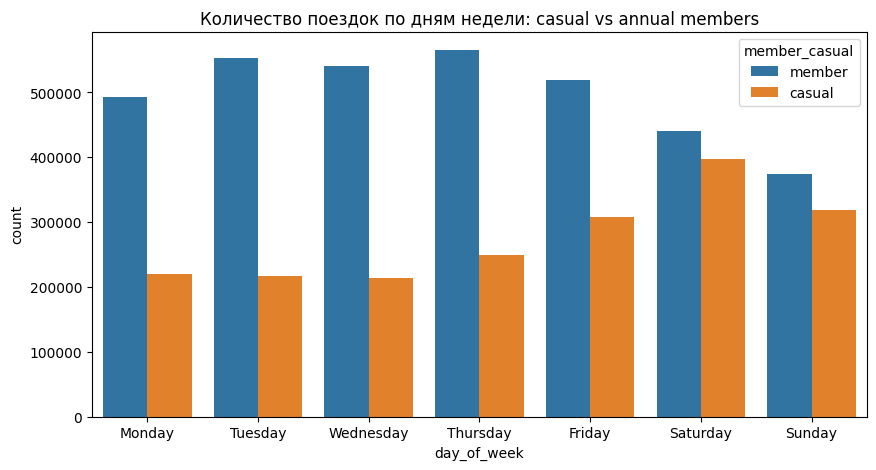

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='day_of_week',
    hue='member_casual',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title('Количество поездок по дням недели: casual vs annual members')
plt.show()

In [41]:
# Среднее ride_length
avg_ride = df.groupby('member_casual')['ride_length'].mean()

# Медианное ride_length
median_ride = df.groupby('member_casual')['ride_length'].median()

print("Средняя длительность поездки (мин):\n", avg_ride)
print("\nМедианная длительность поездки (мин):\n", median_ride)

Средняя длительность поездки (мин):
 member_casual
casual    23.509521
member    12.567110
Name: ride_length, dtype: float64

Медианная длительность поездки (мин):
 member_casual
casual    11.924033
member     8.740000
Name: ride_length, dtype: float64


In [42]:
trip_counts = df['member_casual'].value_counts()
trip_counts

,count
member_casual,
member,3485109
casual,1920483


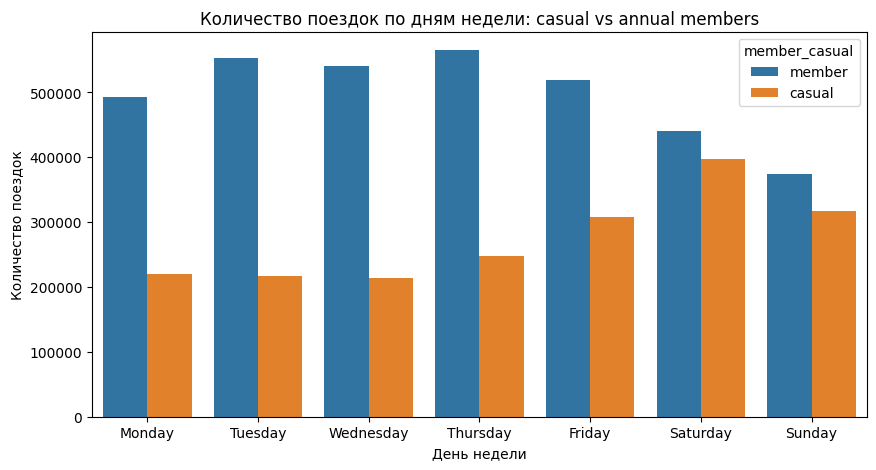

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='day_of_week',
    hue='member_casual',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title('Количество поездок по дням недели: casual vs annual members')
plt.ylabel('Количество поездок')
plt.xlabel('День недели')
plt.show()

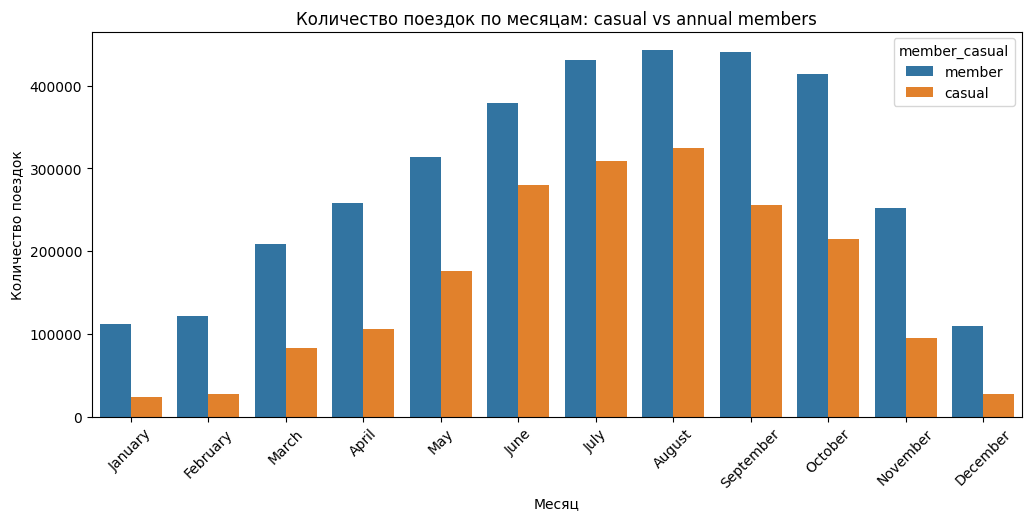

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(
    data=df,
    x='month',
    hue='member_casual',
    order=['January','February','March','April','May','June','July','August','September','October','November','December']
)
plt.title('Количество поездок по месяцам: casual vs annual members')
plt.ylabel('Количество поездок')
plt.xlabel('Месяц')
plt.xticks(rotation=45)
plt.show()

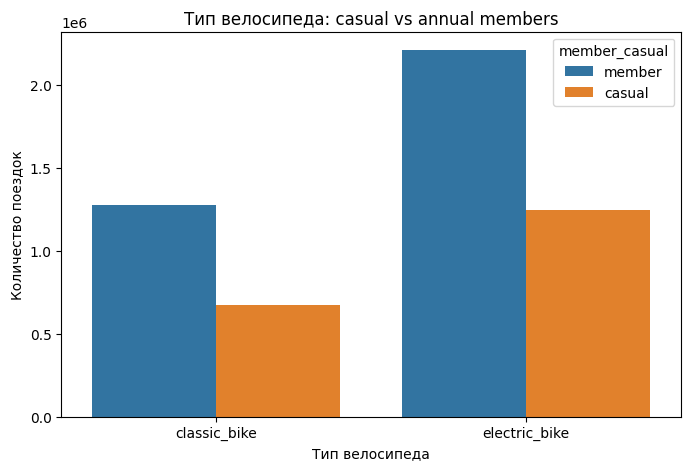

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rideable_type', hue='member_casual')
plt.title('Тип велосипеда: casual vs annual members')
plt.ylabel('Количество поездок')
plt.xlabel('Тип велосипеда')
plt.show()

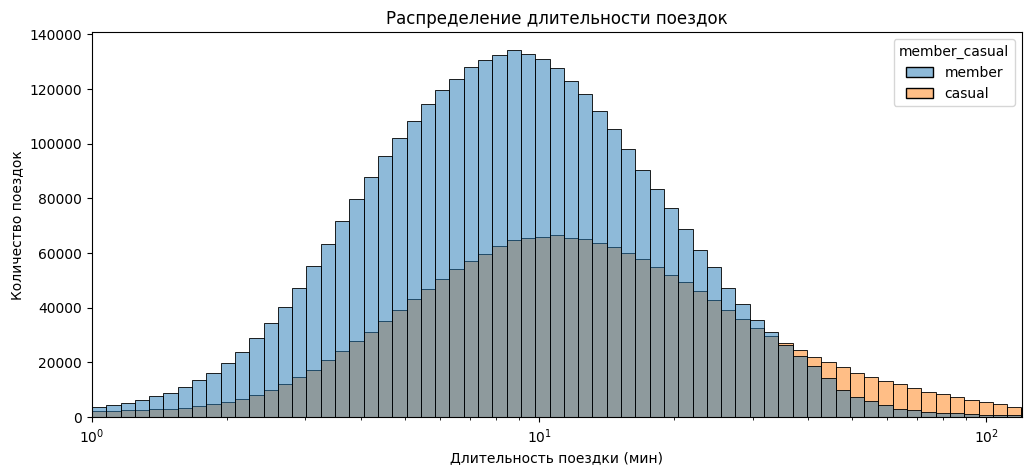

In [49]:
plt.figure(figsize=(12,5))
sns.histplot(df, x='ride_length', hue='member_casual', bins=100, log_scale=True)
plt.xlim(1, 120)  # начинаем с 1 минуты
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поездки (мин)')
plt.ylabel('Количество поездок')
plt.show()


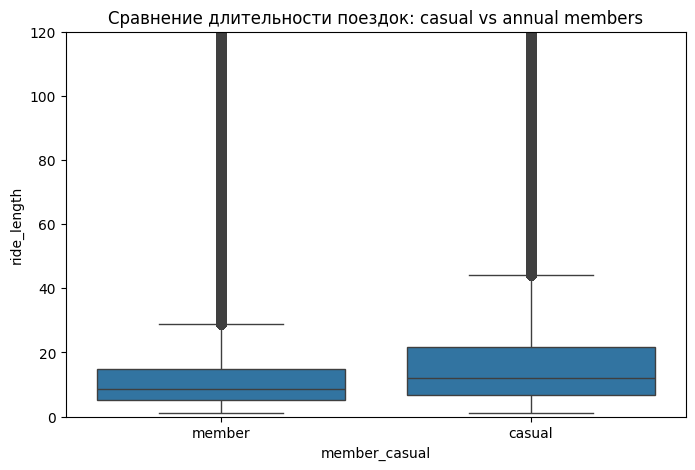

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='member_casual', y='ride_length')
plt.ylim(0, 120)
plt.title('Сравнение длительности поездок: casual vs annual members')
plt.show()

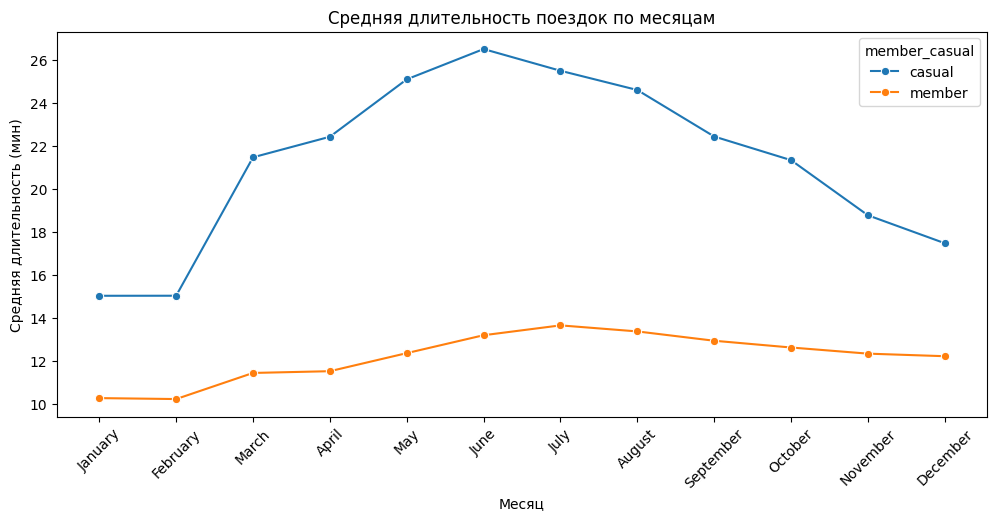

In [52]:
# Сначала группируем и считаем среднюю длительность
monthly_avg = df.groupby(['month','member_casual'])['ride_length'].mean().reset_index()

# Чтобы месяцы шли в правильном порядке
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)

# График
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_avg, x='month', y='ride_length', hue='member_casual', marker='o')
plt.title('Средняя длительность поездок по месяцам')
plt.ylabel('Средняя длительность (мин)')
plt.xlabel('Месяц')
plt.xticks(rotation=45)
plt.show()

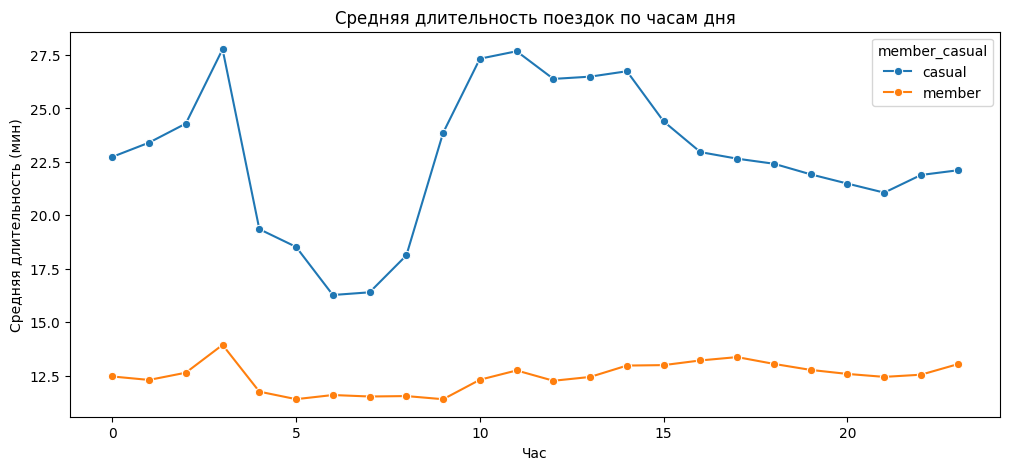

In [53]:
hourly_avg = df.groupby(['hour','member_casual'])['ride_length'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=hourly_avg, x='hour', y='ride_length', hue='member_casual', marker='o')
plt.title('Средняя длительность поездок по часам дня')
plt.xlabel('Час')
plt.ylabel('Средняя длительность (мин)')
plt.show()

In [54]:
bike_type_stats = df.groupby(['rideable_type','member_casual'])['ride_length'].agg(['count','mean']).reset_index()
bike_type_stats

,rideable_type,member_casual,count,mean
0,classic_bike,casual,672670,39.481410
1,classic_bike,member,1275359,14.681942
2,electric_bike,casual,1247813,14.899408
3,electric_bike,member,2209750,11.346532


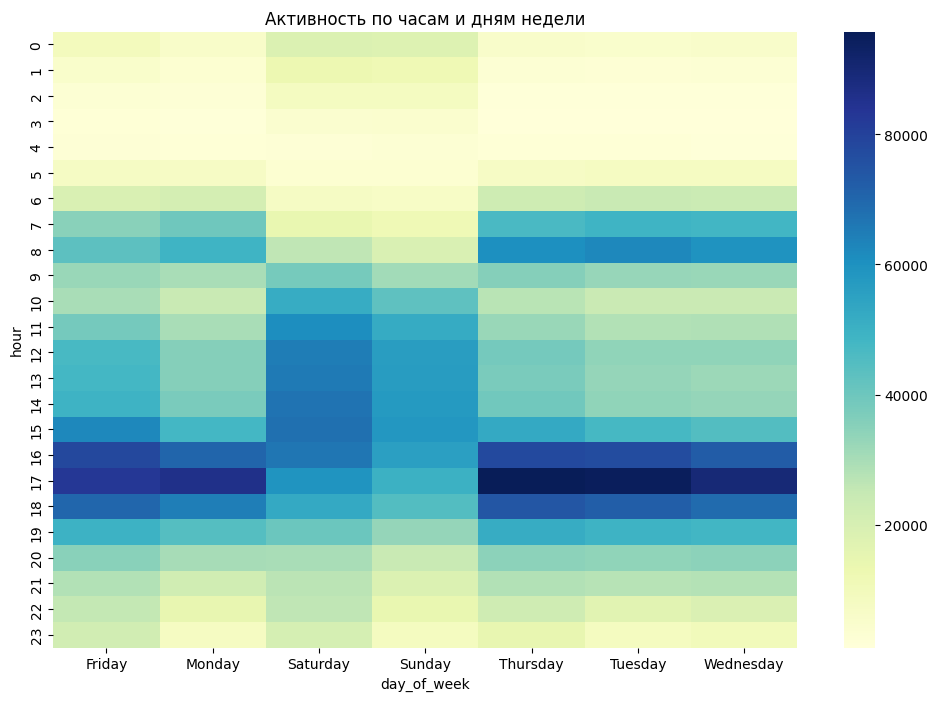

In [57]:
heatmap_data = df.groupby(['day_of_week','hour','member_casual'])['ride_id'].count().reset_index()
heatmap_data = heatmap_data.pivot_table(index='hour', columns='day_of_week', values='ride_id', aggfunc='sum')

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Активность по часам и дням недели')
plt.show()